# Shifted-tilted Tophat at Gaussian interference at waist

Applying first-order shift to tophat without tilt (just to see shifted tophat).

\begin{equation}
	u_{n,m} \rightarrow
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	\exp(i \Psi(z))
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

In [1]:
import PauLisa as pl, PL_Plot as plplt, numpy as np, matplotlib.pyplot as plt, cmath as cm

from mpmath import quadgl
from numpy import pi as pi
import mpmath as mp
import scipy.io


inf=np.inf

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [3]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [4]:
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
modes18= pl.create_modes_order18(listModesM,listModesN,listModesC,NumberModes)
print(params)
print(plane)



wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [5]:
a = 10e-6
alpha = 100e-6
z=0.00023067

In [6]:
f2 = pl.calculate_case2_no_scatter(params,plane,modes,z,a,alpha)

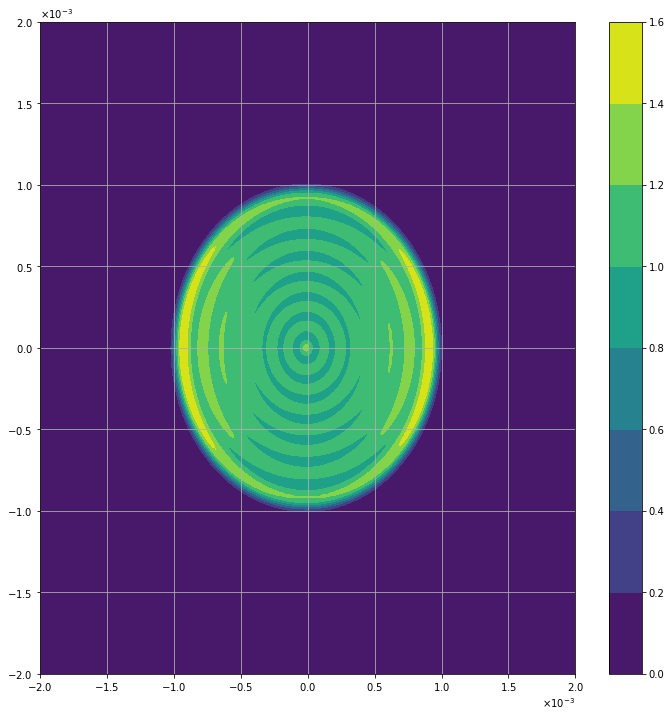

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

plt.savefig("th_full_second_order.png")

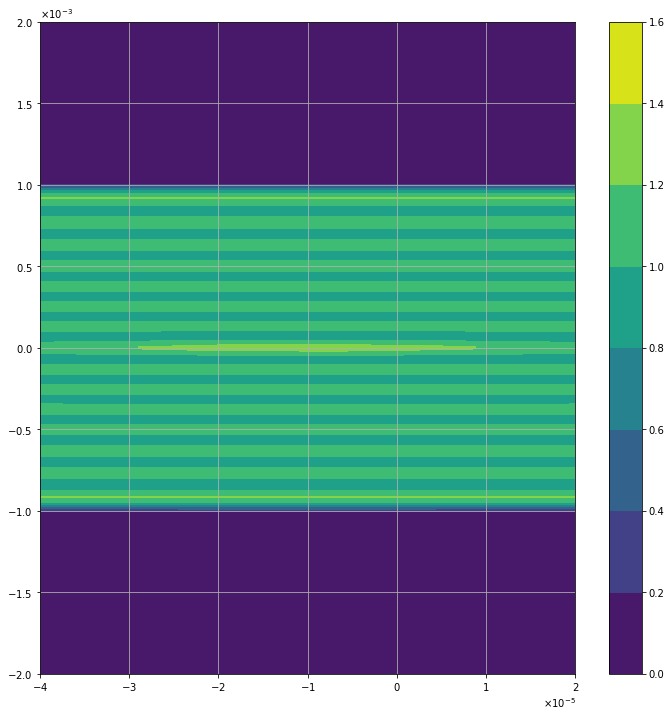

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()
plt.xlim([-40e-6,20e-6])
plt.savefig("th_zoom_second_order.png")

In [ ]:
f = pl.calculate_case2(params,plane,modes,z,a,alpha)
#f = pl.calculate_case2(params,plane,modes18,z,a,alpha)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f.plane.getX(), f.plane.getY(), abs(f.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
alpha_lin = np.linspace(-500e-6,500e-6,5)

c00_ref = 1

modes_ref = pl.modes((0,0,c00_ref))
modes_rec = modes


def integ_1st_order(alpha_lin):
    
    cr = [0]*len(alpha_lin)
    cl = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):
        print(i)

        f = lambda y, x: (pl.amplitude_case2(params,x,y,z,modes_rec,a,alpha_lin[i]))*np.conjugate((pl.amplitude(params,x,y,0,modes_ref)))    
        cr[i] = quadgl(f, [plane.ymin,plane.ymax],[0,plane.xmax])
        cl[i] = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,0])
       
    return (cr,cl)


In [ ]:
cr,cl = integ_1st_order(alpha_lin)

In [ ]:
print(cr,cl)

In [ ]:
size = len(alpha_lin)
phi_r=[0]*size
phi_l=[0]*size
dws_1st_order = [0]*size
lps_1st_order = [0]*size

for i in range(len(alpha_lin)):
    phi_r[i] = cm.phase(cr[i])
    phi_l[i] = cm.phase(cl[i])

    dws_1st_order[i] = 0.5*(phi_r[i]-phi_l[i])
    lps_1st_order[i] = 0.5*(phi_r[i]+phi_l[i])

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(alpha_lin, dws_1st_order)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Gaussian at Waist') 

plt.grid()